
# INFO 4248
## APPRENTISSAGE ARTIFICIEL     TP2 

**TPE 2 . Naive Bayes**


|Name|Surname|Matricule|Email|
|:--:|:-----:|:-------:|:---:|
|TCHENEGHON MOTCHEYO |HERMAN |18T2640|
|MBE MBE MINDJANA|LOIC HENRI |18T2603 |
|TCHAHEU TCHAHEU  |DIMITRI|18T2480|
|PEKA KUISSEU|AUDREY MANUELLA|18T2663|

# **TRAVAIL À FAIRE** :

# IMPLEMENTER Naive Bayes sur le dataset de spam

In [1]:
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
spams = pd.read_csv("./spam.csv", header = 0, encoding = 'ISO-8859-14', sep = ',' )
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Notre jeu de données comporte 5572 observations et 5 colonnes
spams.shape

(5572, 5)

In [11]:
spams.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

### Nous constatons que notre jeu de données à 5 colonnes . Les colonnes Unnamed:3 , 2, 4 ne contienent que des NaN . Donc il faut les supprimer

<AxesSubplot:>

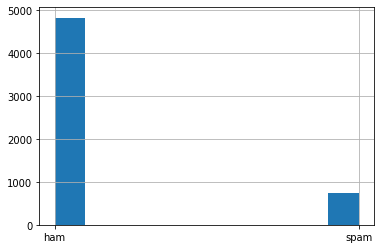

In [12]:
spams['v1'].hist()

### Nous constatons que la proportions des spams des très inférieure par rapport à ceux des hams

# Pretraitement du texte

## suppression des colonnes vides et renommage des noms de colonnes 

In [13]:
spams = spams[['v1', 'v2']] #on recupere les 2 colonnes les plus importantes
spams.columns = ['class', 'text'] #on renomme
spams.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


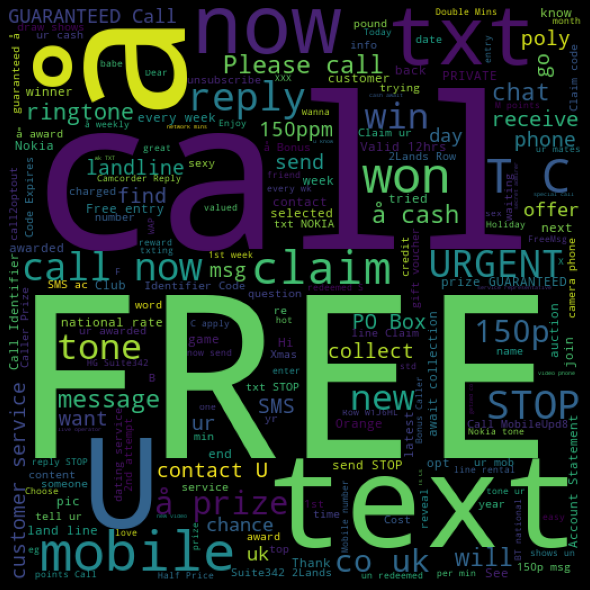

In [14]:

#Nous visualisons les mots qui sont spam

mot_spam = ' '.join(list(spams[spams['class']=='spam']['text']))
spam = WordCloud(width=512 ,height=512).generate(mot_spam)
plt.figure(figsize =(8,8),facecolor ='k')
plt.imshow(spam)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Nous constatons que les mots ci dessus sont beaucoup présent dans les textes déclarées comme spam

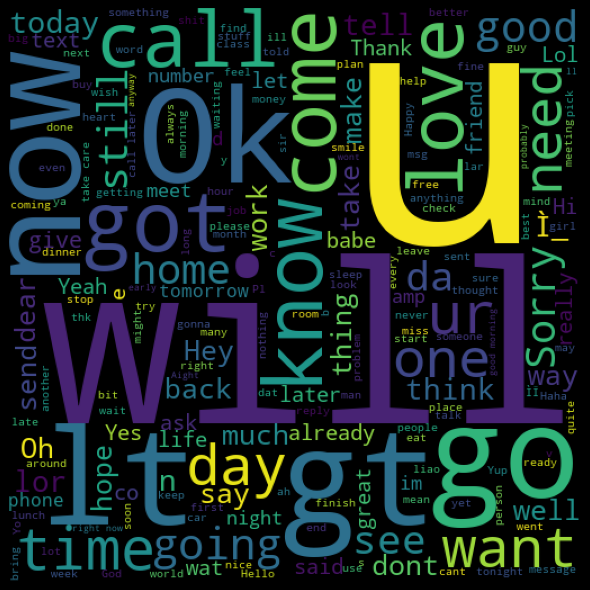

In [15]:
#Nous visualisons les mots qui sont spam

mot_non_spam = ' '.join(list(spams[spams['class']=='ham']['text']))
spam = WordCloud(width=512 ,height=512).generate(mot_non_spam)
plt.figure(figsize =(8,8),facecolor ='k')
plt.imshow(spam)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Nous constatons que les mots ci dessus en grande lettre sont beaucoup présent dans les textes déclarées comme non spam . 


# `Codage des données`
Pour faire la classification bayesienne, il est important de transformer les textes de mails en des vecteurs numeriques leurs representant en s'appuyant sur l'ensemble des mots contenu dans ces derniers (appelé vocabulaire). 

Pour notre cas, nous avons choisi d'utiliser la classe `CountVectorizer` du module `sklearn.feature_extraction.text`, dont la particularité est qu'elle permet de conserver apres transformation des textes la matrice obtenu dans un objet de type `space matrix` permettant de mieux reduire la taille des donnees de la matrice en memoire lorsqu'il y'a grandement de valeur `0` inutile dans notre contexte 



Pour le faire nous pouvons:

        - mettre tous les mots en miniscules 
fait par defaut lors de la conversion avec CountVectorizer
                        
        - recuperer uniquement les racines des mots 
fait par defaut grace au l'expression reguliere par defaut `r"(?u)\b\w\w+\b"`)
    
        - supprimer les mots d'utilité courante (par exemple 'il' , 'nous', ... etc) qui ont une forte probablite d'utilisation (frequence)
egalement fait par defaut, cette frequence d'apparition est considere compris entre [0.7 .. 1]
    
        - donner un nombre de mots maximales
induira forcement une baisse de performance du model


In [17]:

# on instancie le converteur de donnees texte de sklearn
data_converter = CountVectorizer()
v = data_converter.fit(spams.text)
# on realise la conversion
spam_convert = data_converter.fit_transform(spams.text)

print(" dimension  de la nouvelle matrice: ", spam_convert.shape)
#print(" matrice y contenu : \n", spam_convert.toarray())

first_30  = list(v.vocabulary_.keys())[:30]
for key in first_30 :
    print(key , ":" ,v.vocabulary_[key])


 dimension  de la nouvelle matrice:  (5572, 8681)
go : 3550
until : 8029
jurong : 4350
point : 5920
crazy : 2327
available : 1303
only : 5537
in : 4087
bugis : 1751
great : 3634
world : 8488
la : 4476
buffet : 1749
cine : 2048
there : 7645
got : 3594
amore : 1069
wat : 8266
ok : 5504
lar : 4512
joking : 4318
wif : 8391
oni : 5533
free : 3358
entry : 2949
wkly : 8446
comp : 2165
to : 7756
win : 8404
fa : 3087


# Phase d'entrainement et evaluation

## Decoupage en partie de test et d'apprentissage homogene des donnes pretraitees

In [18]:

data, labels = spam_convert.toarray(), spams['class'].values

X_train, X_test, y_train, y_test = train_test_split( data, labels, train_size=0.8, test_size=0.2, stratify= labels)
#stratify pour que la distribution des elements soit les memes dans le jeu de test que d'apprentissage

## Methode  d' evaluation

In [19]:
## accurancy

def exactitude(m):
    result= 0
    for i in range(m.shape[0]):
        result += m[i,i]
    return result/(sum(sum(m)))
    
def precision(m):
    result=0
    for i in range(m.shape[0]):
        result += m[i,i]/sum(m[:,i])
    return result/2   
    
def rappel(m):
    result=0
    for i in range(m.shape[0]):
        result += m[i,i]/sum(m[i,:])
    return result/2 
def f_mesure(m):
    r=p=0
    for i in range(m.shape[0]):
        r += m[i,i]/sum(m[i,:])
        p += m[i,i]/sum(m[:,i])
    r/=2
    p/=2
    return 2*r*p/(r+p) 


# Implementation du modele de naive bayes 

In [23]:
import numpy as np

class NaiveBayes(object):

    def __init__(self):
        self.classes = [] #probabilité des classes 
        self.prioiri = [] #proba apriori
        self.vraissemblance = [] #vecteur de dictionnaire
        self.colonnes = 0 
        
    # fonction d'entrainement
    def entrainement(self,x, y):
        
        n_lignes = x.shape[0]
        if len(y) != n_lignes :
            raise Exception("la taille de 'y' n'es pas egale au nombre de ligne de 'x'")
        
        # Calcul des probabilites a priori et conservations des noms de classes
        self.colonnes = x.shape[1] #permet de contenir le nombre de caractériques 
        res = np.unique(y, return_counts=True) # recupere les classes et les nombres d'occurences dans les données
        self.prioiri = (res[1]/n_lignes) #nombre d'elements de chaque classe/ n_lignes
        self.classes = res[0]
        
        # Calcul des probabilites de vraissemblence et conservations d'attributs
        attributs = []
        for i in range(self.colonnes):
            attributs.append(np.unique(x[:,i]).tolist()) #prend les valeurs attributs en fonction des colonnes
        
        # pour chaque classe cj
        for i in range(self.classes.shape[0]):
        
            # restriction du tableau de depart selon la classe
            indices = np.where(y == self.classes[i])
            data = x[indices][:]
            
            s = []
            # pour chaque attribut
            for j in range(self.colonnes):
                
                probabite = {}
                # pour chaque valeur d'attributs
                for val_atribut in attributs[j]:
                    # occurence de l'attribut dans le sous tableau
                    occur = len(np.where(data[:,j] == val_atribut)[0])
                    probabite[val_atribut] = occur / data.shape[0]
            
                s.append(probabite)
            self.vraissemblance.append(s)         
    
    # fonction d'inference 
    def inference(self, x):
        if x.shape[1] != self.colonnes :
            raise Exception("la donnee fourni n'es pas compatible avec le modele")
            
        predict = []
        # pour chaque ligne
        for i in range(x.shape[0]):
            
            # on retrouve la classe maximisant la probabilite posteriori
            p = self.prioiri.copy()
            for j in range(self.classes.shape[0]):
                
                # pour tous les attributs
                for k in range(x.shape[1]):
                    try:
                        val = x[i,k]
                        p[j] *= self.vraissemblance[j][k][val]
                    except KeyError:
                        pass
                    
            # choisir un indice aleatoirement s'il y'a plusieurs choix
            max_p = max(p)
            indices = np.where(p == max_p)[0]
            ind = indices[0]
                
            # ajout de la classe trouve
            predict.append(self.classes[ind])
        return predict
 

In [24]:
def print_evaluation(mat):
    p = pd.DataFrame(mat , columns = ['ham', 'spam'])
    p.index = ['ham' , 'spam']
    return p

def transform_matrice(V):
    df = pd.DataFrame({'value': V},
                      index = ['exactitude', 'precision', 'rappel' , 'F-mesure'])
    return df

In [25]:
model = NaiveBayes()
model.entrainement(X_train, y_train)

pred = model.inference(X_test)
matrice_confusion = confusion_matrix(y_true=y_test, y_pred=pred)
p = print_evaluation(matrice_confusion)
q = transform_matrice([exactitude(matrice_confusion) , precision(matrice_confusion) , rappel(matrice_confusion) , f_mesure(matrice_confusion)])

In [26]:
print("Matrice de Confusion")
p

Matrice de Confusion


,ham,spam
ham,964,2
spam,51,98


In [27]:
q

,value
exactitude,0.952466
precision,0.964877
rappel,0.827824
F-mesure,0.891111


# Interpretation des metriques

#### **L' exactitude** du model est assez bonne . Mais nous ne pouvons pas nous fier à ce résultat puisque la proportion des spams est très petite par rapport au non spam, il faudrait evamuer le modele sur de nouvelles donnees representatives.

#### **La précision**: Si le modele anti-spam indique que cet e-mail est un spam, quelle est la probabilité qu'il s'agisse d'un spam ?"  Dans notre exemple de spam par e-mail, une précision  de 97 % signifie que 3 % de ce qui a été signalé comme spam n'était pas du spam. Il s'agit d'un taux raisonnable.

#### **Le rappel** : De tous les spams de l'ensemble d'e-mails, quelle fraction le modele anti-spam a-t-il détectée "Pour notre modele anti-spam, il s'agit de 89 %, ce qui signifie qu'environ 11 % des spams que nous recevons arrivent toujours dans notre boîte de réception.
